# Original Source
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

Step 1: Import Big Mart sales dataset.
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Train.csv')
df.head()
df.shape

(8523, 12)

In [ ]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

Step 2: Data Preprocessing

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.shape

Impute missing values

In [ ]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Deal with categorical variables and drop the id columns

In [ ]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [ ]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

(8523, 36)

Step 3: Train test Split and Model Training

In [ ]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

Scaling the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
k_list=[]
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k_list.append(K)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1602.0722472978293
RMSE value for k=  2 is: 1384.1614949450652
RMSE value for k=  3 is: 1309.7080209436008
RMSE value for k=  4 is: 1273.4593376247394
RMSE value for k=  5 is: 1265.1691552801944
RMSE value for k=  6 is: 1264.016629682352
RMSE value for k=  7 is: 1254.4540277555775
RMSE value for k=  8 is: 1256.3336305051153
RMSE value for k=  9 is: 1257.0429171877095
RMSE value for k=  10 is: 1256.8832006776345
RMSE value for k=  11 is: 1255.990269411629
RMSE value for k=  12 is: 1255.1744653627713
RMSE value for k=  13 is: 1258.0303948034777
RMSE value for k=  14 is: 1261.4475868099503
RMSE value for k=  15 is: 1264.7463738667984
RMSE value for k=  16 is: 1270.7805030831637
RMSE value for k=  17 is: 1276.1615242114003
RMSE value for k=  18 is: 1281.1445587591772
RMSE value for k=  19 is: 1285.2417237312009
RMSE value for k=  20 is: 1291.2518994231564
RMSE value for k=  21 is: 1294.8864521472271
RMSE value for k=  22 is: 1297.4834940389105
RMSE value for k=  23

In [ ]:
best_rmse_score=min(rmse_val)
best_k=k_list[rmse_val.index(best_rmse_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_rmse_score)

Optimum K value= 7  with F1-Score= 1254.4540277555775


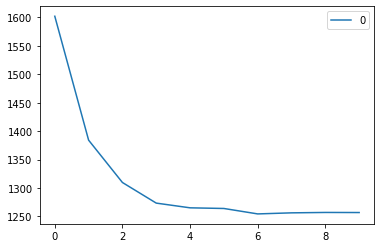

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

As we discussed, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 7, the RMSE is approximately 1219.06, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
error

1254.4540277555775

In [ ]:
test=pd.read_csv('/content/Test.csv')

In [ ]:
#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

Step 4"Validation on Test set

In [ ]:
#predicting on the test set and creating submission file
predict = model.predict(test)

Step 5: PErformance Metrics

In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
print("Accuracy:",metrics.r2_score(y_test,pred))
print("MAE     :",metrics.mean_absolute_error(y_test,pred))
print("MSE     :",metrics.mean_squared_error(y_test,pred))
print("RMSE    :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

Accuracy: 0.48035319169226476
MAE     : 899.9236096988658
MSE     : 1573654.9077521912
RMSE    : 1254.4540277555775
